In [1]:
import kagglehub as kgh
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

In [ ]:
df = kgh.dataset_load(KaggleDatasetAdapter.PANDAS, 
                      handle='rohiteng/spotify-music-analytics-dataset-20152025', 
                      path='spotify_2015_2025_85k.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          85000 non-null  object 
 1   track_name        84979 non-null  object 
 2   artist_name       85000 non-null  object 
 3   album_name        84954 non-null  object 
 4   release_date      85000 non-null  object 
 5   genre             85000 non-null  object 
 6   duration_ms       85000 non-null  int64  
 7   popularity        85000 non-null  int64  
 8   danceability      85000 non-null  float64
 9   energy            85000 non-null  float64
 10  key               85000 non-null  int64  
 11  loudness          85000 non-null  float64
 12  mode              85000 non-null  int64  
 13  instrumentalness  85000 non-null  float64
 14  tempo             85000 non-null  float64
 15  stream_count      85000 non-null  int64  
 16  country           85000 non-null  object

<Axes: xlabel='country', ylabel='count'>

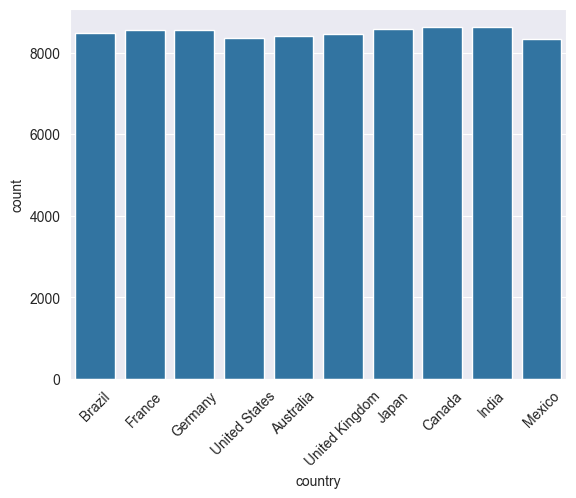

In [4]:
# this chart just counts values. I can change 'count' to ['percent', 'proportion', 'probability']
plt.xticks(rotation=45)
sns.countplot(df, x='country', stat='count')

In [5]:
edited_df = df.copy()
edited_df['release_year'] = pd.to_datetime(df['release_date']).dt.year

<Axes: xlabel='release_year', ylabel='count'>

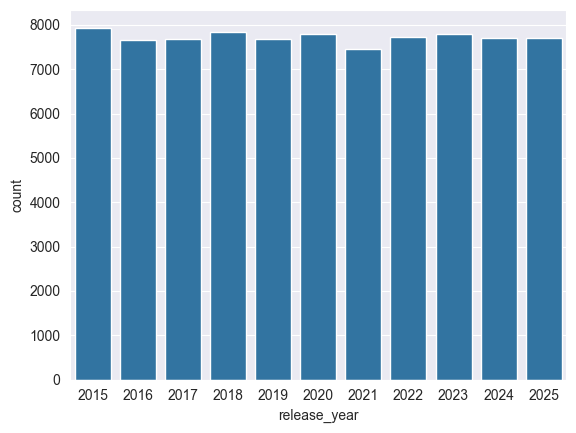

In [6]:
sns.countplot(edited_df, x='release_year')

In [ ]:
# this is a quick way of creating df with special condition
df_2016 = edited_df[edited_df['release_year'] == 2016]
df_2016

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label,release_year
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music,2016
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings,2016
11,TRK-04AD6A91EF55,Truth out major,Jack Galloway,Education,2016-05-10,EDM,207806,54,0.11,0.04,9,-43.11,0,0.443,159.10,3000,United States,0,Independent,2016
20,TRK-24A9E12BDE5F,Always bank price north,Dean Santiago,Draw how,2016-04-17,Rock,380048,61,0.25,0.35,4,-27.71,1,0.550,186.75,19000,United States,0,Sony Music,2016
22,TRK-1BFD61E2B1A8,These hard,Roy Warner,Worker southern,2016-08-29,Classical,156818,53,0.93,0.96,5,-43.66,0,0.032,153.37,2000,France,0,EMI,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84921,TRK-861BF0CF7D38,General series,Courtney Arias,Police article,2016-07-10,Metal,130000,34,0.18,0.97,0,-10.46,1,0.472,75.83,3000,Australia,1,Island Records,2016
84928,TRK-593B08FEA8F1,Study,Taylor Lawson,Black fly,2016-10-03,Hip-Hop,257349,43,0.24,0.82,7,-13.78,1,0.761,107.35,1000,Germany,0,EMI,2016
84937,TRK-8224391BC7DD,Pull nor likely across baby,Dylan Cuevas,Concern onto,2016-03-31,Reggaeton,180583,44,0.17,0.95,9,-39.29,1,0.361,165.08,2000,Brazil,0,Universal Music,2016
84986,TRK-2A86C9F65239,Above,William Pierce,Own amount,2016-04-21,Jazz,113264,47,0.19,0.39,4,-18.33,0,0.560,178.90,9000,Germany,0,Warner Music,2016


<Axes: xlabel='stream_count', ylabel='Count'>

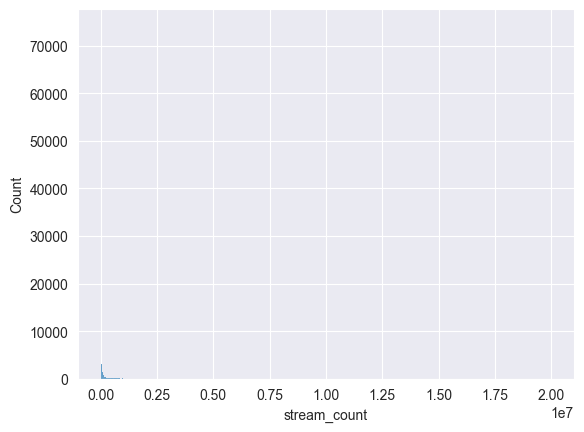

In [ ]:
# not very usable because of extreme values
sns.histplot(df, x='stream_count')

In [17]:
pd.options.display.float_format = '{:.2f}'.format

In [18]:
df['stream_count'].describe()

count      85000.00
mean      214354.68
std      1680637.47
min         1000.00
25%         1000.00
50%         2000.00
75%         9000.00
max     20000000.00
Name: stream_count, dtype: float64

<Axes: xlabel='stream_count', ylabel='Count'>

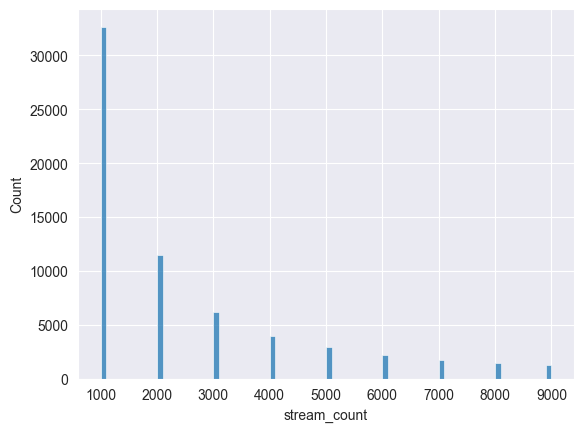

In [23]:
# i will limit the data to the 75th percentile
df_e = df[df['stream_count'] < 10000]
sns.histplot(df_e, x='stream_count')